# This code is to compare the data collected from 2 different hardwares, 3080 and 4090

In [22]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
cur_dir = os.getcwd()
print(cur_dir)

parent_dir = os.path.dirname(cur_dir)
print(parent_dir)

file3080_dir = os.path.join(parent_dir, '3080', 'CNNModelsData')
file4090_dir = os.path.join(parent_dir, '4090', 'CNNModelsData')

print(file3080_dir)
print(file4090_dir)

/Users/dtjgp/Projects/GreenAI/Comparision_3080_4090
/Users/dtjgp/Projects/GreenAI
/Users/dtjgp/Projects/GreenAI/3080/CNNModelsData
/Users/dtjgp/Projects/GreenAI/4090/CNNModelsData


## Comparison of 3080 and 4090

In [24]:
def get_epoch_energy(npyfile):
    energy_consumption = np.zeros((npyfile.shape[0],1))
    for epoch in range(npyfile.shape[0]):
        energy_consumption[epoch] = 0 
        for batch in range(npyfile.shape[1]):
            energy_consumption[epoch] += (npyfile[epoch][batch][1] - npyfile[epoch][batch][0]) * npyfile[epoch][batch][2]
    return energy_consumption

In [47]:
# plot the energy data for the 3080 and 4090 models select the alexnet model, resnet18 model resnet34 model, googlenet_origin model and vgg11 model and mobilenetv1 model
dataset = ['fashion_mnist', 'cifar100']
model = ['alexnet', 'resnet18', 'resnet34', 'googlenet_origin', 'vgg11', 'mobilenetv2']
sample_folder = 'E5_B128_R0_SR2'

# load each step energy consumption to sum up to get each epoch energy consumption in Training process
def readfiles(hardware, model, dataset, sample_folder, file_dir):
    file_dir = os.path.join(hardware, model, dataset, sample_folder)
    # read the energy consumption npy files from the directory
    to_device_energy = np.load(os.path.join(file_dir, 'to_device_energy.npy'), allow_pickle=True)
    forward_energy = np.load(os.path.join(file_dir, 'forward_energy.npy'), allow_pickle=True)
    loss_energy = np.load(os.path.join(file_dir, 'loss_energy.npy'), allow_pickle=True)
    backward_energy = np.load(os.path.join(file_dir, 'backward_energy.npy'), allow_pickle=True)
    optimize_energy = np.load(os.path.join(file_dir, 'optimize_energy.npy'), allow_pickle=True)
    # sum up the energy consumption for each step
    to_device_total_energy = get_epoch_energy(to_device_energy)
    forward_total_energy = get_epoch_energy(forward_energy)
    loss_total_energy = get_epoch_energy(loss_energy)
    backward_total_energy = get_epoch_energy(backward_energy)
    optimize_total_energy = get_epoch_energy(optimize_energy)
    # sum up the energy consumption for each epoch
    total_energy = to_device_total_energy + forward_total_energy + loss_total_energy + backward_total_energy + optimize_total_energy
    return total_energy




# 3080 alexnet
alexnet3080_f = pd.read_csv(os.path.join(file3080_dir, model[0], dataset[0], sample_folder, 'labeled_energy_data.csv'))
alexnet3080_f_train = readfiles(file3080_dir, model[0], dataset[0], sample_folder, file3080_dir)
alexnet3080_c = pd.read_csv(os.path.join(file3080_dir, model[0], dataset[1], sample_folder, 'labeled_energy_data.csv'))
alexnet3080_c_train = readfiles(file3080_dir, model[0], dataset[1], sample_folder, file3080_dir)

# 3080 resnet18
resnet183080_f = pd.read_csv(os.path.join(file3080_dir, model[1], dataset[0], sample_folder, 'labeled_energy_data.csv'))
resnet183080_f_train = readfiles(file3080_dir, model[1], dataset[0], sample_folder, file3080_dir)
resnet183080_c = pd.read_csv(os.path.join(file3080_dir, model[1], dataset[1], sample_folder, 'labeled_energy_data.csv'))
resnet183080_c_train = readfiles(file3080_dir, model[1], dataset[1], sample_folder, file3080_dir)

# 4090 alexnet
alexnet4090_f = pd.read_csv(os.path.join(file4090_dir, model[0], dataset[0], sample_folder, 'labeled_energy_data.csv'))
alexnet4090_f_train = readfiles(file4090_dir, model[0], dataset[0], sample_folder, file4090_dir)
alexnet4090_c = pd.read_csv(os.path.join(file4090_dir, model[0], dataset[1], sample_folder, 'labeled_energy_data.csv'))
alexnet4090_c_train = readfiles(file4090_dir, model[0], dataset[1], sample_folder, file4090_dir)

# 4090 resnet18
resnet184090_f = pd.read_csv(os.path.join(file4090_dir, model[1], dataset[0], sample_folder, 'labeled_energy_data.csv'))
resnet184090_f_train = readfiles(file4090_dir, model[1], dataset[0], sample_folder, file4090_dir)
resnet184090_c = pd.read_csv(os.path.join(file4090_dir, model[1], dataset[1], sample_folder, 'labeled_energy_data.csv'))
resnet184090_c_train = readfiles(file4090_dir, model[1], dataset[1], sample_folder, file4090_dir)

# 3080 resnet34
resnet343080_f = pd.read_csv(os.path.join(file3080_dir, model[2], dataset[0], sample_folder, 'labeled_energy_data.csv'))
resnet343080_f_train = readfiles(file3080_dir, model[2], dataset[0], sample_folder, file3080_dir)
resnet343080_c = pd.read_csv(os.path.join(file3080_dir, model[2], dataset[1], sample_folder, 'labeled_energy_data.csv'))
resnet343080_c_train = readfiles(file3080_dir, model[2], dataset[1], sample_folder, file3080_dir)

# 4090 resnet34
resnet344090_f = pd.read_csv(os.path.join(file4090_dir, model[2], dataset[0], sample_folder, 'labeled_energy_data.csv'))
resnet344090_f_train = readfiles(file4090_dir, model[2], dataset[0], sample_folder, file4090_dir)
resnet344090_c = pd.read_csv(os.path.join(file4090_dir, model[2], dataset[1], sample_folder, 'labeled_energy_data.csv'))
resnet344090_c_train = readfiles(file4090_dir, model[2], dataset[1], sample_folder, file4090_dir)

# 3080 googlenet_origin
googlenet_origin3080_f = pd.read_csv(os.path.join(file3080_dir, model[3], dataset[0], sample_folder, 'labeled_energy_data.csv'))
googlenet_origin3080_f_train = readfiles(file3080_dir, model[3], dataset[0], sample_folder, file3080_dir)
googlenet_origin3080_c = pd.read_csv(os.path.join(file3080_dir, model[3], dataset[1], sample_folder, 'labeled_energy_data.csv'))
googlenet_origin3080_c_train = readfiles(file3080_dir, model[3], dataset[1], sample_folder, file3080_dir)

# 4090 googlenet_origin
googlenet_origin4090_f = pd.read_csv(os.path.join(file4090_dir, model[3], dataset[0], sample_folder, 'labeled_energy_data.csv'))
googlenet_origin4090_f_train = readfiles(file4090_dir, model[3], dataset[0], sample_folder, file4090_dir)
googlenet_origin4090_c = pd.read_csv(os.path.join(file4090_dir, model[3], dataset[1], sample_folder, 'labeled_energy_data.csv'))
googlenet_origin4090_c_train = readfiles(file4090_dir, model[3], dataset[1], sample_folder, file4090_dir)

# 3080 vgg11
vgg113080_f = pd.read_csv(os.path.join(file3080_dir, model[4], dataset[0], sample_folder, 'labeled_energy_data.csv'))
vgg113080_f_train = readfiles(file3080_dir, model[4], dataset[0], sample_folder, file3080_dir)
vgg113080_c = pd.read_csv(os.path.join(file3080_dir, model[4], dataset[1], sample_folder, 'labeled_energy_data.csv'))
vgg113080_c_train = readfiles(file3080_dir, model[4], dataset[1], sample_folder, file3080_dir)

# 4090 vgg11
vgg114090_f = pd.read_csv(os.path.join(file4090_dir, model[4], dataset[0], sample_folder, 'labeled_energy_data.csv'))
vgg114090_f_train = readfiles(file4090_dir, model[4], dataset[0], sample_folder, file4090_dir)
vgg114090_c = pd.read_csv(os.path.join(file4090_dir, model[4], dataset[1], sample_folder, 'labeled_energy_data.csv'))
vgg114090_c_train = readfiles(file4090_dir, model[4], dataset[1], sample_folder, file4090_dir)

# 3080 mobilenetv1
mobilenetv23080_f = pd.read_csv(os.path.join(file3080_dir, model[5], dataset[0], sample_folder, 'labeled_energy_data.csv'))
mobilenetv23080_f_train = readfiles(file3080_dir, model[5], dataset[0], sample_folder, file3080_dir)
mobilenetv23080_c = pd.read_csv(os.path.join(file3080_dir, model[5], dataset[1], sample_folder, 'labeled_energy_data.csv'))
mobilenetv23080_c_train = readfiles(file3080_dir, model[5], dataset[1], sample_folder, file3080_dir)

# 4090 mobilenetv1
mobilenetv24090_f = pd.read_csv(os.path.join(file4090_dir, model[5], dataset[0], sample_folder, 'labeled_energy_data.csv'))
mobilenetv24090_f_train = readfiles(file4090_dir, model[5], dataset[0], sample_folder, file4090_dir)
mobilenetv24090_c = pd.read_csv(os.path.join(file4090_dir, model[5], dataset[1], sample_folder, 'labeled_energy_data.csv'))
mobilenetv24090_c_train = readfiles(file4090_dir, model[5], dataset[1], sample_folder, file4090_dir)



In [48]:
# # Create a color map and marker map for the steps
# step_colors = {
#     'idle': 'gray',
#     'to_device': 'blue',
#     'forward': 'green',
#     'loss': 'red',
#     'backward': 'purple',
#     'optimize': 'orange'
# }
# step_markers = {
#     'idle': 'o',
#     'to_device': 's',
#     'forward': '^',
#     'loss': 'D',
#     'backward': 'x',
#     'optimize': 'P'
# }

In [49]:
# # Plot the energy data of each sample with scatter plot and line plot
# def plot_energy_data(labeled_energy_data, step_colors, step_markers, model_name, plot_folder):
#     # Plot the data with a larger figure size
#     fig, ax = plt.subplots(figsize=(12, 6))

#     # Plot each step with a different marker
#     for step in step_colors.keys():
#         step_data = labeled_energy_data[labeled_energy_data['step'] == step]
#         ax.scatter(step_data['timestamp'], step_data['power_in_watts'], color=step_colors[step], label=step, s=5, marker=step_markers[step])

#     ax.set_xlabel(f'Timestamp Across All Samples in {model_name}')
#     ax.set_ylabel('Power in Watts')
#     ax.set_title(f'Energy Data of Each Sample in {model_name}')
#     ax.legend()
#     plt.show()
#     # save the figure, to a specific directory
#     plt.savefig(os.path.join(plot_folder, f'energy_data of {model_name}.png'))

#     # Create a new figure and axis
#     fig, ax = plt.subplots(figsize=(12,6))

#     # Plot each step with a different color
#     for step in step_colors.keys():
#         step_data = labeled_energy_data[labeled_energy_data['step'] == step]
#         # if step != 'idle':
#         ax.plot(step_data['timestamp'], step_data['power_in_watts'], color=step_colors[step], label=step)

#     ax.set_xlabel(f'Timestamp Across All Samples in {model_name}')
#     ax.set_ylabel('Power in Watts')
#     ax.set_title(f'Energy Data of Each Sample in {model_name} in Line Plot')
#     ax.legend()
#     plt.show()
#     # save the figure, to a specific directory
#     plt.savefig(os.path.join(plot_folder, f'energy_data of {model_name} in line plot.png'))

In [50]:
# # Create a plot folder if it doesn't exist
# plot_folder = os.path.join(cur_dir, 'plots')
# if not os.path.exists(plot_folder):
#     os.makedirs(plot_folder)

# # Plot 3080 data for fashion_mnist
# plot_energy_data(alexnet3080_f, step_colors, step_markers, 'alexnet3080_fashion', plot_folder)
# plot_energy_data(resnet183080_f, step_colors, step_markers, 'resnet183080_fashion', plot_folder)
# plot_energy_data(resnet343080_f, step_colors, step_markers, 'resnet343080_fashion', plot_folder)
# plot_energy_data(googlenet_origin3080_f, step_colors, step_markers, 'googlenet3080_fashion', plot_folder)
# plot_energy_data(vgg113080_f, step_colors, step_markers, 'vgg113080_fashion', plot_folder)
# plot_energy_data(mobilenetv13080_f, step_colors, step_markers, 'mobilenetv13080_fashion', plot_folder)

# # Plot 3080 data for cifar100
# plot_energy_data(alexnet3080_c, step_colors, step_markers, 'alexnet3080_cifar', plot_folder)
# plot_energy_data(resnet183080_c, step_colors, step_markers, 'resnet183080_cifar', plot_folder)
# plot_energy_data(resnet343080_c, step_colors, step_markers, 'resnet343080_cifar', plot_folder)
# plot_energy_data(googlenet_origin3080_c, step_colors, step_markers, 'googlenet3080_cifar', plot_folder)
# plot_energy_data(vgg113080_c, step_colors, step_markers, 'vgg113080_cifar', plot_folder)
# plot_energy_data(mobilenetv13080_c, step_colors, step_markers, 'mobilenetv13080_cifar', plot_folder)

# # Plot 4090 data for fashion_mnist
# plot_energy_data(alexnet4090_f, step_colors, step_markers, 'alexnet4090_fashion', plot_folder)
# plot_energy_data(resnet184090_f, step_colors, step_markers, 'resnet184090_fashion', plot_folder)
# plot_energy_data(resnet344090_f, step_colors, step_markers, 'resnet344090_fashion', plot_folder)
# plot_energy_data(googlenet_origin4090_f, step_colors, step_markers, 'googlenet4090_fashion', plot_folder)
# plot_energy_data(vgg114090_f, step_colors, step_markers, 'vgg114090_fashion', plot_folder)
# plot_energy_data(mobilenetv14090_f, step_colors, step_markers, 'mobilenetv14090_fashion', plot_folder)

# # Plot 4090 data for cifar100
# plot_energy_data(alexnet4090_c, step_colors, step_markers, 'alexnet4090_cifar', plot_folder)
# plot_energy_data(resnet184090_c, step_colors, step_markers, 'resnet184090_cifar', plot_folder)
# plot_energy_data(resnet344090_c, step_colors, step_markers, 'resnet344090_cifar', plot_folder)
# plot_energy_data(googlenet_origin4090_c, step_colors, step_markers, 'googlenet4090_cifar', plot_folder)
# plot_energy_data(vgg114090_c, step_colors, step_markers, 'vgg114090_cifar', plot_folder)
# plot_energy_data(mobilenetv14090_c, step_colors, step_markers, 'mobilenetv14090_cifar', plot_folder)

In [51]:
# # Convert timestamp to a readable datetime format for better visualization
# data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# # Plotting the data
# plt.figure(figsize=(12, 6))
# plt.plot(data['timestamp'], data['power_in_watts'], label='Power', linewidth=0.8)
# plt.xlabel('Time')
# plt.ylabel('Power (W)')
# plt.title('Power vs Time')
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

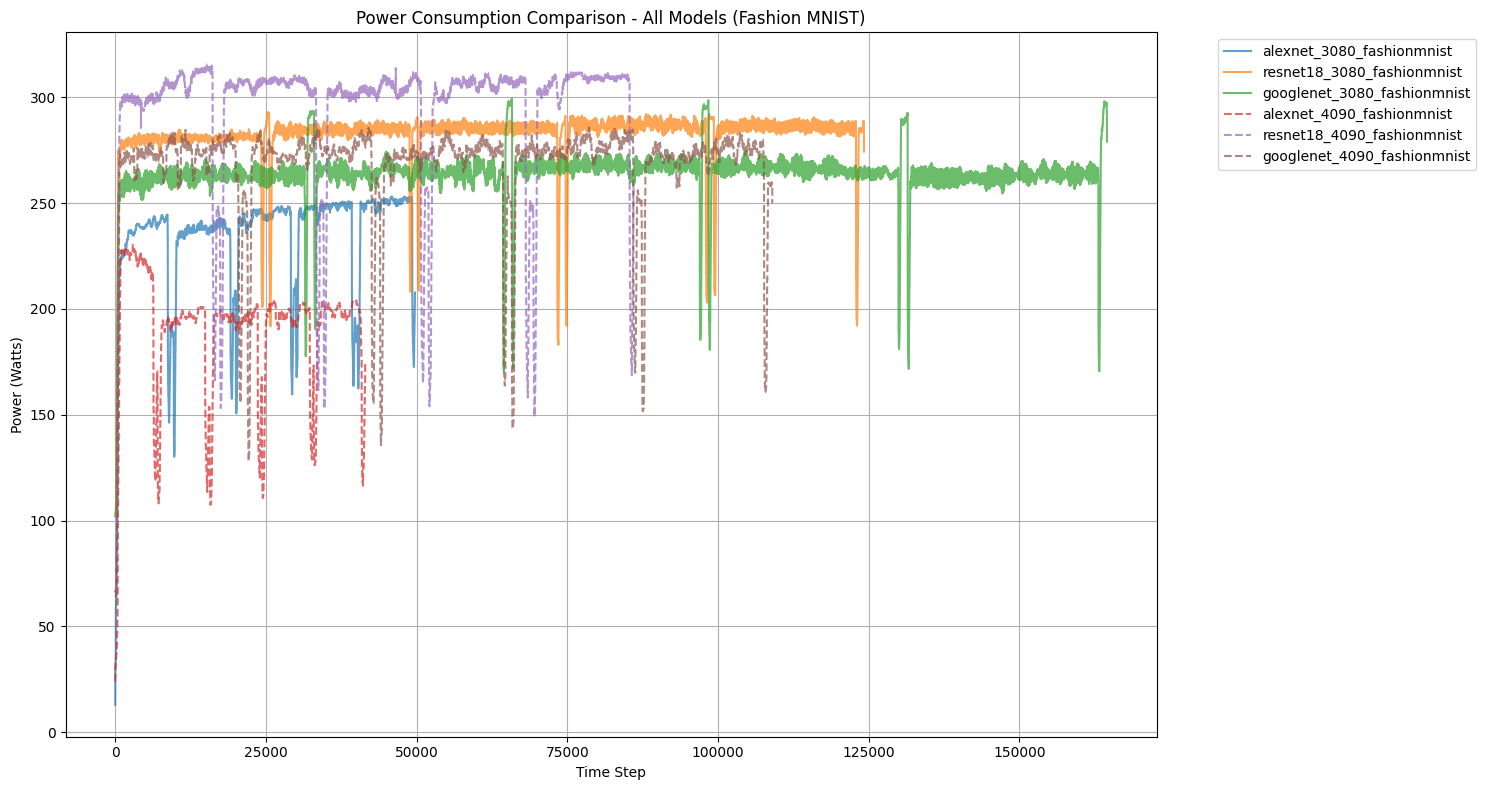

In [60]:
# Create a figure
plt.figure(figsize=(15, 8))

# Plot data for 3080 models
plt.plot(alexnet3080_f['power_in_watts'][:len(alexnet3080_f)//2], label='alexnet_3080_fashionmnist', alpha=0.7)
# plt.plot(alexnet3080_c['power_in_watts'][:], label='alexnet3080_cifar100', alpha=0.7)
plt.plot(resnet183080_f['power_in_watts'][:], label='resnet18_3080_fashionmnist', alpha=0.7)
plt.plot(googlenet_origin3080_f['power_in_watts'][:], label='googlenet_3080_fashionmnist', alpha=0.7)

# Plot data for 4090 models with dashed lines
plt.plot(alexnet4090_f['power_in_watts'][:41500], label='alexnet_4090_fashionmnist', alpha=0.7, linestyle='--')
# plt.plot(alexnet4090_c['power_in_watts'][:50000], label='alexnet4090_cifar100', alpha=0.7, linestyle='--')
plt.plot(resnet184090_f['power_in_watts'][:86000], label='resnet18_4090_fashionmnist', alpha=0.7, linestyle='--')
plt.plot(googlenet_origin4090_f['power_in_watts'][:109000], label='googlenet_4090_fashionmnist', alpha=0.7, linestyle='--')


# Customize the plot
plt.xlabel('Time Step')
plt.ylabel('Power (Watts)')
plt.title('Power Consumption Comparison - All Models (Fashion MNIST)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


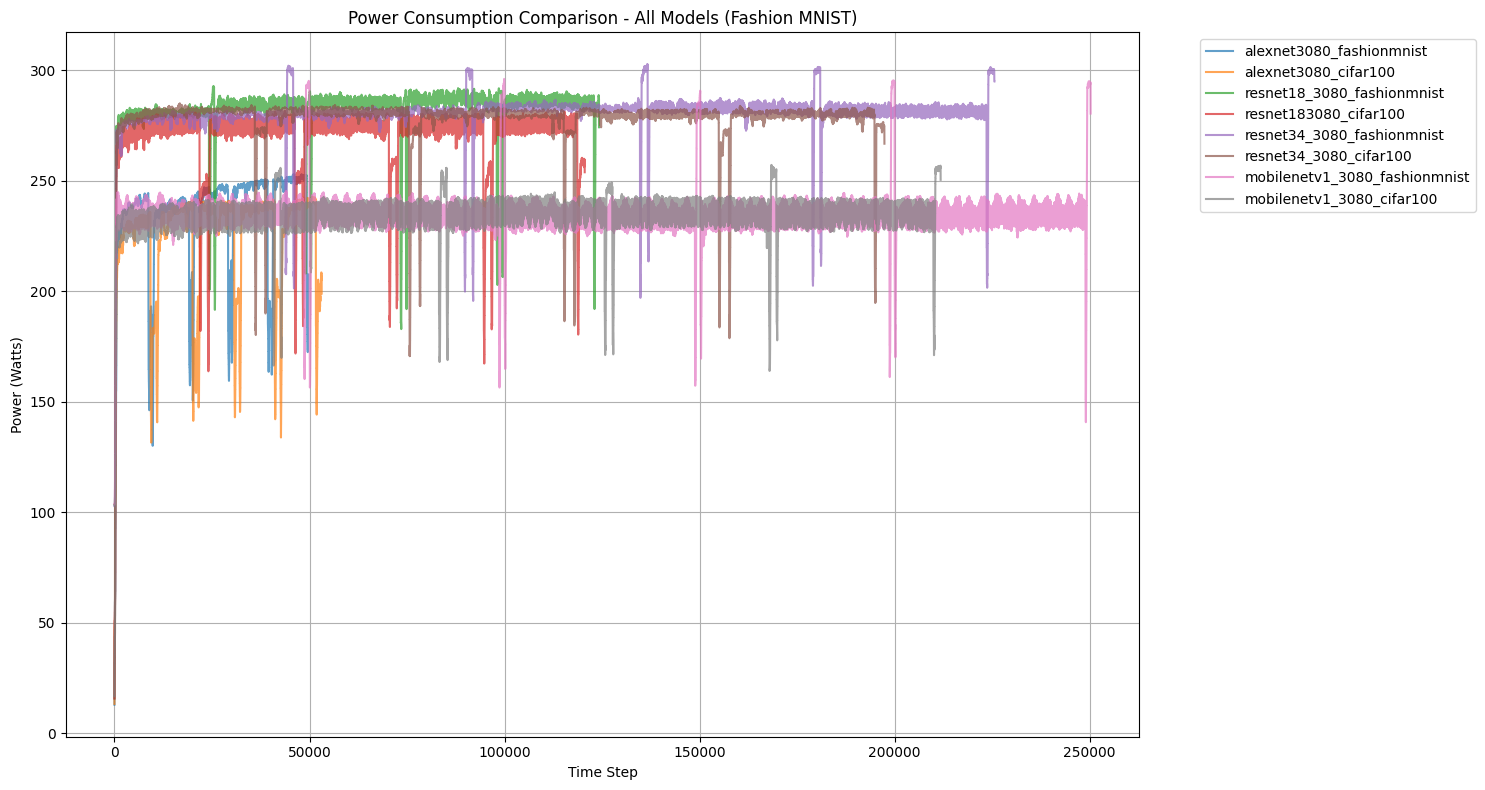

In [62]:
# Create a figure
plt.figure(figsize=(15, 8))

# Plot data for 3080 models
plt.plot(alexnet3080_f['power_in_watts'][:len(alexnet3080_f)//2], label='alexnet3080_fashionmnist', alpha=0.7)
plt.plot(alexnet3080_c['power_in_watts'][:], label='alexnet3080_cifar100', alpha=0.7)
plt.plot(resnet183080_f['power_in_watts'][:], label='resnet18_3080_fashionmnist', alpha=0.7)
plt.plot(resnet183080_c['power_in_watts'][:], label='resnet183080_cifar100', alpha=0.7)
plt.plot(resnet343080_f['power_in_watts'][:], label='resnet34_3080_fashionmnist', alpha=0.7)
plt.plot(resnet343080_c['power_in_watts'][:], label='resnet34_3080_cifar100', alpha=0.7)
plt.plot(mobilenetv23080_f['power_in_watts'][:], label='mobilenetv1_3080_fashionmnist', alpha=0.7)
plt.plot(mobilenetv23080_c['power_in_watts'][:], label='mobilenetv1_3080_cifar100', alpha=0.7)

# # Plot data for 4090 models with dashed lines
# plt.plot(alexnet4090_f['power_in_watts'][:41500], label='alexnet4090_fashionmnist', alpha=0.7, linestyle='--')
# plt.plot(alexnet4090_c['power_in_watts'][:50000], label='alexnet4090_cifar100', alpha=0.7, linestyle='--')


# Customize the plot
plt.xlabel('Time Step')
plt.ylabel('Power (Watts)')
plt.title('Power Consumption Comparison - All Models (Fashion MNIST)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


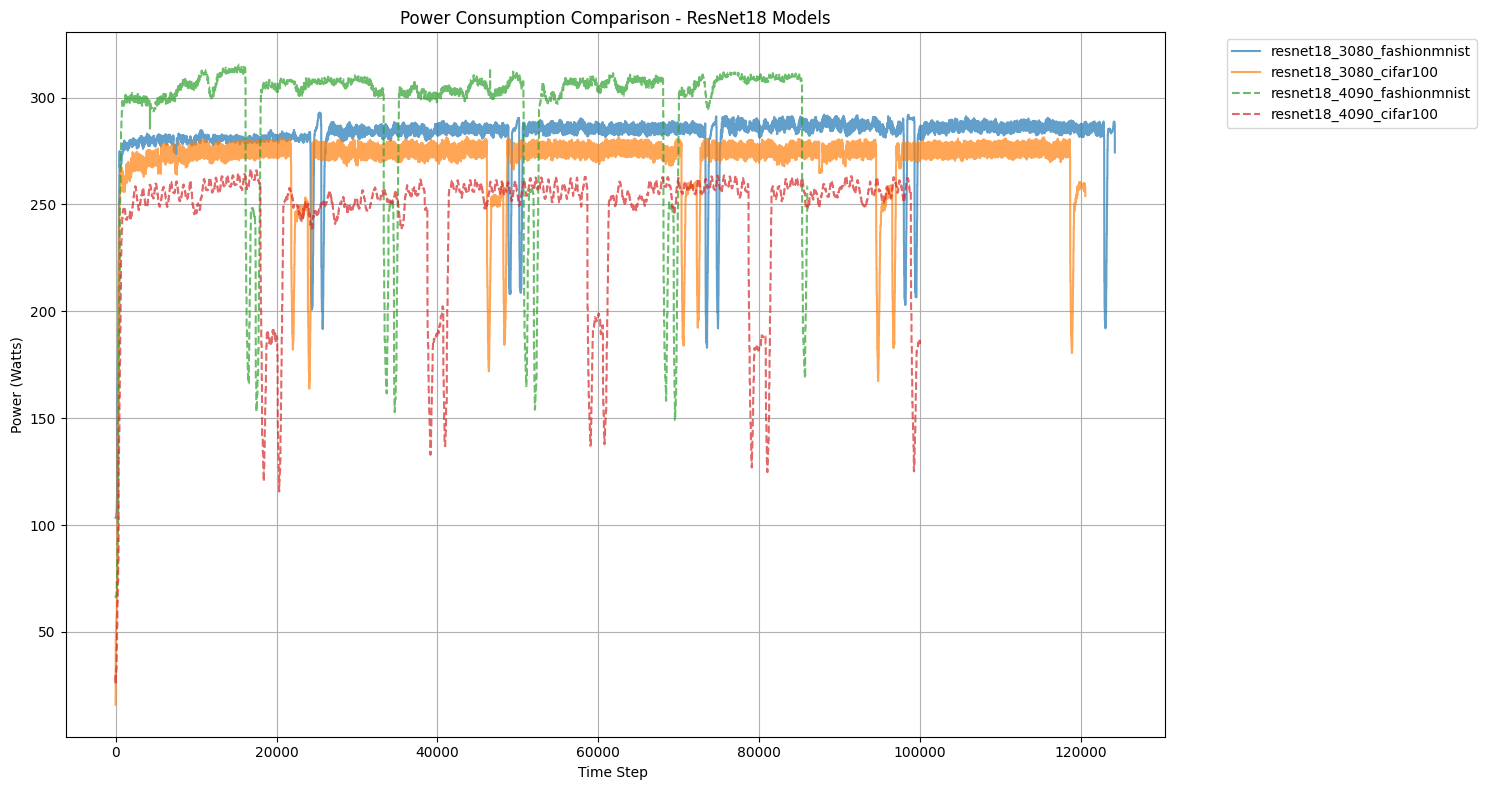

In [31]:
# Create a figure
plt.figure(figsize=(15, 8))

# Plot data for 3080 models
plt.plot(resnet183080_f['power_in_watts'][:], label='resnet18_3080_fashionmnist', alpha=0.7)
plt.plot(resnet183080_c['power_in_watts'][:], label='resnet18_3080_cifar100', alpha=0.7)

# Plot data for 4090 models with dashed lines
plt.plot(resnet184090_f['power_in_watts'][:86000], label='resnet18_4090_fashionmnist', alpha=0.7, linestyle='--')
plt.plot(resnet184090_c['power_in_watts'][:100000], label='resnet18_4090_cifar100', alpha=0.7, linestyle='--')

# Customize the plot
plt.xlabel('Time Step ')
plt.ylabel('Power (Watts)')
plt.title('Power Consumption Comparison - ResNet18 Models')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


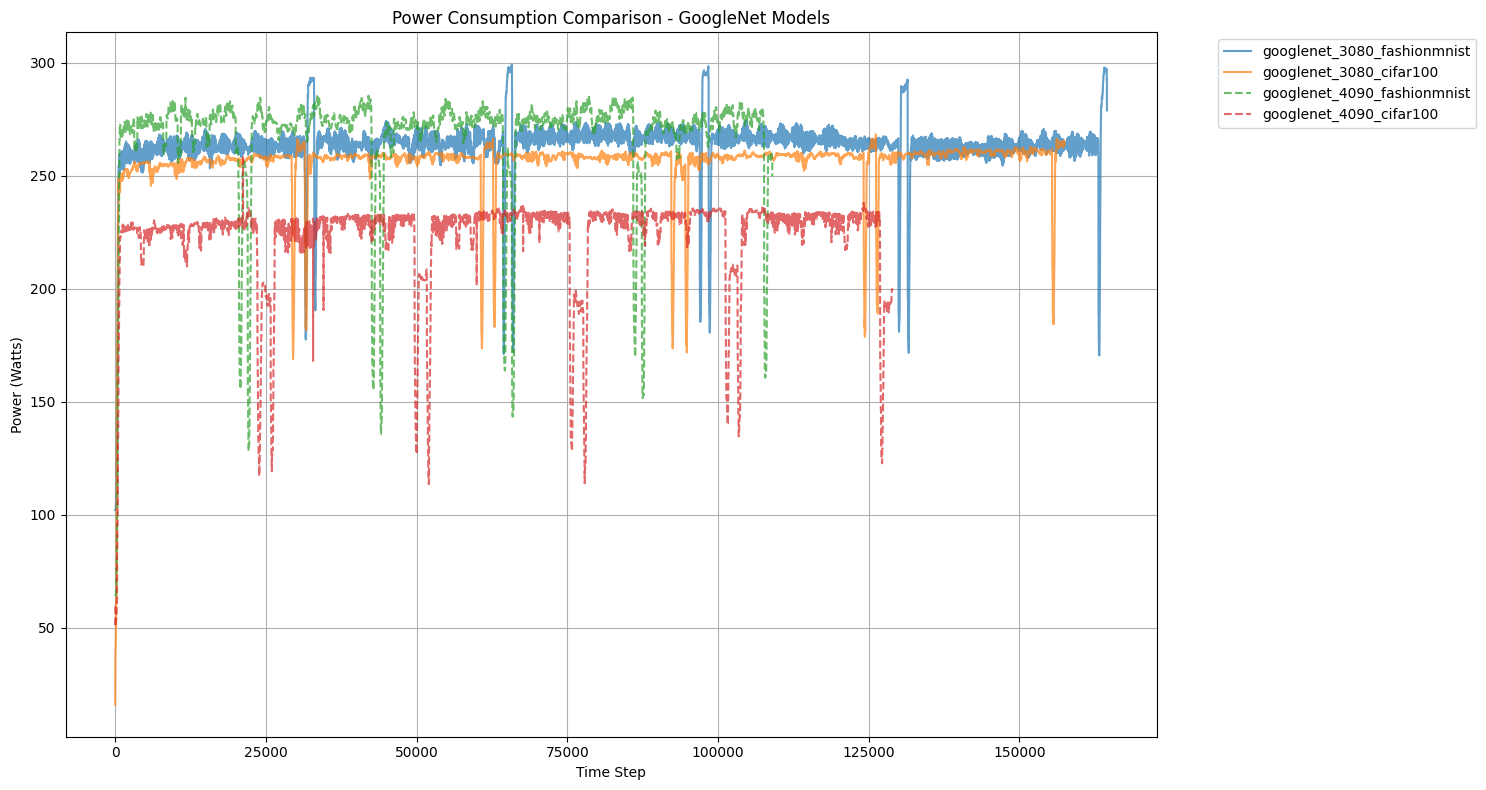

In [32]:
# Create a figure
plt.figure(figsize=(15, 8))

# Plot data for 3080 models
plt.plot(googlenet_origin3080_f['power_in_watts'][:], label='googlenet_3080_fashionmnist', alpha=0.7)
plt.plot(googlenet_origin3080_c['power_in_watts'][:], label='googlenet_3080_cifar100', alpha=0.7)

# Plot data for 4090 models with dashed lines
plt.plot(googlenet_origin4090_f['power_in_watts'][:109000], label='googlenet_4090_fashionmnist', alpha=0.7, linestyle='--')
plt.plot(googlenet_origin4090_c['power_in_watts'][:129000], label='googlenet_4090_cifar100', alpha=0.7, linestyle='--')

# Customize the plot
plt.xlabel('Time Step')
plt.ylabel('Power (Watts)')
plt.title('Power Consumption Comparison - GoogleNet Models')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


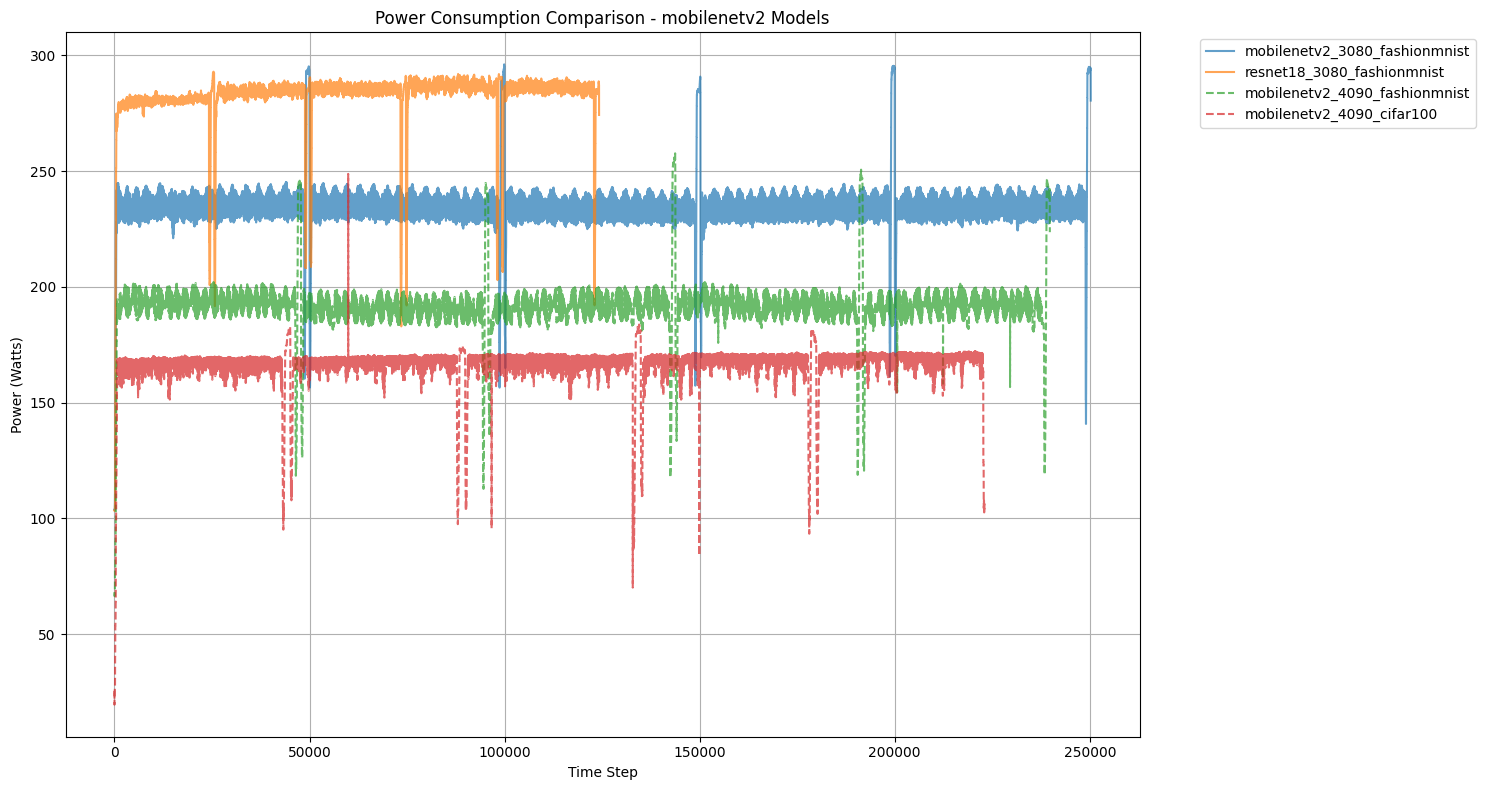

In [33]:
# Create a figure
plt.figure(figsize=(15, 8))

# Plot data for 3080 models
plt.plot(mobilenetv23080_f['power_in_watts'][:], label='mobilenetv2_3080_fashionmnist', alpha=0.7)
plt.plot(resnet183080_f['power_in_watts'][:], label='resnet18_3080_fashionmnist', alpha=0.7)

# Plot data for 4090 models with dashed lines
plt.plot(mobilenetv24090_f['power_in_watts'][:], label='mobilenetv2_4090_fashionmnist', alpha=0.7, linestyle='--')
plt.plot(mobilenetv24090_c['power_in_watts'][:223000], label='mobilenetv2_4090_cifar100', alpha=0.7, linestyle='--')

# Customize the plot
plt.xlabel('Time Step')
plt.ylabel('Power (Watts)')
plt.title('Power Consumption Comparison - mobilenetv2 Models')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

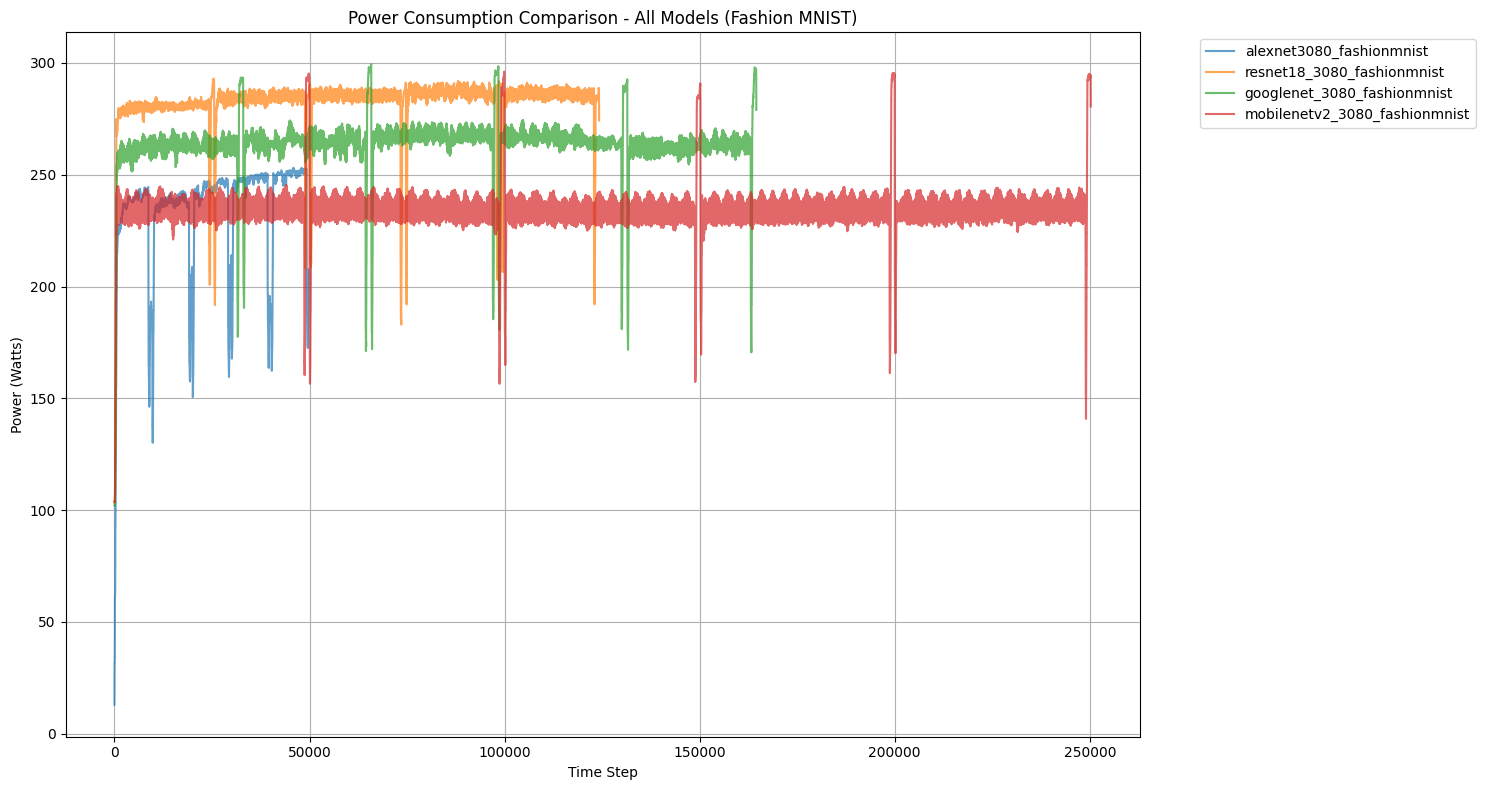

In [34]:
# Create a figure
plt.figure(figsize=(15, 8))

# Plot data for 3080 models
plt.plot(alexnet3080_f['power_in_watts'][:len(alexnet3080_f)//2], label='alexnet3080_fashionmnist', alpha=0.7)
plt.plot(resnet183080_f['power_in_watts'][:], label='resnet18_3080_fashionmnist', alpha=0.7)
plt.plot(googlenet_origin3080_f['power_in_watts'][:], label='googlenet_3080_fashionmnist', alpha=0.7)
plt.plot(mobilenetv23080_f['power_in_watts'][:], label='mobilenetv2_3080_fashionmnist', alpha=0.7)

# Customize the plot
plt.xlabel('Time Step')
plt.ylabel('Power (Watts)')
plt.title('Power Consumption Comparison - All Models (Fashion MNIST)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()


## Comparison of all the energy consumption data collected from 3080 and 4090

In [35]:
def calculate_totalenergy(npyfile):
    energy = 0
    for epoch in range(npyfile.shape[0]):
        for batch in range(npyfile.shape[1]):
            energy += (npyfile[epoch][batch][1] - npyfile[epoch][batch][0]) * npyfile[epoch][batch][2]
    return energy


In [36]:
# find all the data in the file3080_dir
modelslist = os.listdir(file3080_dir)
# create a dictionary to store the total energy for each model
total_energy_dict_f_3080 = {}
for model in modelslist:
    # get the data folder for each model
    datafolder = os.path.join(file3080_dir, model, dataset[0], sample_folder)
    # print(datafolder)
    # get the to_device_energy.npy, forward_energy.npy, loss_energy.npy, backward_energy.npy, optimize_energy.npy
    to_device_energy = np.load(os.path.join(datafolder, 'to_device_energy.npy'), allow_pickle=True)
    forward_energy = np.load(os.path.join(datafolder, 'forward_energy.npy'), allow_pickle=True)
    loss_energy = np.load(os.path.join(datafolder, 'loss_energy.npy'), allow_pickle=True)
    backward_energy = np.load(os.path.join(datafolder, 'backward_energy.npy'), allow_pickle=True)
    optimize_energy = np.load(os.path.join(datafolder, 'optimize_energy.npy'), allow_pickle=True)

    # calculate the total energy for each step, the shape is (5, 469, 3)
    to_device_totalenergy = calculate_totalenergy(to_device_energy)
    forward_totalenergy = calculate_totalenergy(forward_energy)
    loss_totalenergy = calculate_totalenergy(loss_energy)
    backward_totalenergy = calculate_totalenergy(backward_energy)
    optimize_totalenergy = calculate_totalenergy(optimize_energy)

    # total consumption energy
    total_energy = to_device_totalenergy + forward_totalenergy + loss_totalenergy + backward_totalenergy + optimize_totalenergy

    # store the total energy for each model
    total_energy_dict_f_3080[model] = total_energy

print(total_energy_dict_f_3080)

{'googlenet_origin': 6369.781229416533, 'resnet50': 10581.744209791215, 'resnet34': 15642.585051412809, 'mobilenetv2': 9095.863585598378, 'vgg13': 189606.95335206322, 'googlenet_mod7': 11311.688135393806, 'googlenet_mod9': 612.8297170117277, 'googlenet_mod8': 20239.913846635816, 'googlenet_mod1': 4203.496031620222, 'googlenet_mod6': 5485.586579400379, 'resnet18': 4995.363282606904, 'mobilenetv1': 1815.9795224899408, 'vgg16': 287872.58915847685, 'vgg11': 43143.818687905245, 'googlenet_mod3': 4198.589761037991, 'googlenet_mod4': 4165.539260468766, 'googlenet_mod5': 2236.4643704451178, 'googlenet_mod2': 1967.6826250417273, 'alexnet': 295.97153643742}


In [37]:
# find all the data in the file3080_dir
modelslist = os.listdir(file3080_dir)
# create a dictionary to store the total energy for each model
total_energy_dict_c_3080 = {}
for model in modelslist:
    # get the data folder for each model
    datafolder = os.path.join(file3080_dir, model, dataset[1], sample_folder)
    # print(datafolder)
    # get the to_device_energy.npy, forward_energy.npy, loss_energy.npy, backward_energy.npy, optimize_energy.npy
    to_device_energy = np.load(os.path.join(datafolder, 'to_device_energy.npy'), allow_pickle=True)
    forward_energy = np.load(os.path.join(datafolder, 'forward_energy.npy'), allow_pickle=True)
    loss_energy = np.load(os.path.join(datafolder, 'loss_energy.npy'), allow_pickle=True)
    backward_energy = np.load(os.path.join(datafolder, 'backward_energy.npy'), allow_pickle=True)
    optimize_energy = np.load(os.path.join(datafolder, 'optimize_energy.npy'), allow_pickle=True)

    # calculate the total energy for each step, the shape is (5, 469, 3)
    to_device_totalenergy = calculate_totalenergy(to_device_energy)
    forward_totalenergy = calculate_totalenergy(forward_energy)
    loss_totalenergy = calculate_totalenergy(loss_energy)
    backward_totalenergy = calculate_totalenergy(backward_energy)
    optimize_totalenergy = calculate_totalenergy(optimize_energy)

    # total consumption energy
    total_energy = to_device_totalenergy + forward_totalenergy + loss_totalenergy + backward_totalenergy + optimize_totalenergy

    # store the total energy for each model
    total_energy_dict_c_3080[model] = total_energy

print(total_energy_dict_c_3080)

{'googlenet_origin': 5891.637167761389, 'resnet50': 9451.735848029926, 'resnet34': 13619.78180653549, 'mobilenetv2': 16754.398666789246, 'vgg13': 171429.3962756959, 'googlenet_mod7': 9860.901478997079, 'googlenet_mod9': 705.4852040518023, 'googlenet_mod8': 17325.43437565124, 'googlenet_mod1': 3969.9795914654223, 'googlenet_mod6': 4963.2246856042875, 'resnet18': 4515.226129508075, 'mobilenetv1': 1490.349492291362, 'vgg16': 243172.3573257249, 'vgg11': 41048.05634844155, 'googlenet_mod3': 3924.785779313404, 'googlenet_mod4': 3810.0770148649563, 'googlenet_mod5': 2145.46847033542, 'googlenet_mod2': 1961.5040928073824, 'alexnet': 370.34955116671995}


In [38]:
# find all the data in the file3080_dir
modelslist = os.listdir(file4090_dir)
# create a dictionary to store the total energy for each model
total_energy_dict_f_4090 = {}
for model in modelslist:
    # get the data folder for each model
    datafolder = os.path.join(file4090_dir, model, dataset[0], sample_folder)
    # print(datafolder)
    # get the to_device_energy.npy, forward_energy.npy, loss_energy.npy, backward_energy.npy, optimize_energy.npy
    to_device_energy = np.load(os.path.join(datafolder, 'to_device_energy.npy'), allow_pickle=True)
    forward_energy = np.load(os.path.join(datafolder, 'forward_energy.npy'), allow_pickle=True)
    loss_energy = np.load(os.path.join(datafolder, 'loss_energy.npy'), allow_pickle=True)
    backward_energy = np.load(os.path.join(datafolder, 'backward_energy.npy'), allow_pickle=True)
    optimize_energy = np.load(os.path.join(datafolder, 'optimize_energy.npy'), allow_pickle=True)

    # calculate the total energy for each step, the shape is (5, 469, 3)
    to_device_totalenergy = calculate_totalenergy(to_device_energy)
    forward_totalenergy = calculate_totalenergy(forward_energy)
    loss_totalenergy = calculate_totalenergy(loss_energy)
    backward_totalenergy = calculate_totalenergy(backward_energy)
    optimize_totalenergy = calculate_totalenergy(optimize_energy)

    # total consumption energy
    total_energy = to_device_totalenergy + forward_totalenergy + loss_totalenergy + backward_totalenergy + optimize_totalenergy

    # store the total energy for each model
    total_energy_dict_f_4090[model] = total_energy

print(total_energy_dict_f_4090)

{'googlenet_origin': 1645.4841447105553, 'resnet50': 2846.7825444882687, 'resnet34': 3856.5022146539945, 'mobilenetv2': 2709.713069150905, 'vgg13': 36882.08830716445, 'googlenet_mod7': 2707.9700789378207, 'googlenet_mod9': 168.47616601492075, 'googlenet_mod8': 4335.003926126788, 'googlenet_mod1': 1118.8799742098577, 'googlenet_mod6': 1301.7066488738492, 'resnet18': 1381.2649272316762, 'mobilenetv1': 534.1169041297976, 'vgg16': 79035.01199656453, 'vgg11': 9905.240135384727, 'googlenet_mod3': 1136.3212935576498, 'googlenet_mod4': 1099.1774360228576, 'googlenet_mod5': 511.55078116472185, 'googlenet_mod2': 557.8491089768272, 'alexnet': 63.80397837721369}


In [39]:
# find all the data in the file3080_dir
modelslist = os.listdir(file4090_dir)
# create a dictionary to store the total energy for each model
total_energy_dict_c_4090 = {}
for model in modelslist:
    # get the data folder for each model
    datafolder = os.path.join(file4090_dir, model, dataset[1], sample_folder)
    # print(datafolder)
    # get the to_device_energy.npy, forward_energy.npy, loss_energy.npy, backward_energy.npy, optimize_energy.npy
    to_device_energy = np.load(os.path.join(datafolder, 'to_device_energy.npy'), allow_pickle=True)
    forward_energy = np.load(os.path.join(datafolder, 'forward_energy.npy'), allow_pickle=True)
    loss_energy = np.load(os.path.join(datafolder, 'loss_energy.npy'), allow_pickle=True)
    backward_energy = np.load(os.path.join(datafolder, 'backward_energy.npy'), allow_pickle=True)
    optimize_energy = np.load(os.path.join(datafolder, 'optimize_energy.npy'), allow_pickle=True)

    # calculate the total energy for each step, the shape is (5, 469, 3)
    to_device_totalenergy = calculate_totalenergy(to_device_energy)
    forward_totalenergy = calculate_totalenergy(forward_energy)
    loss_totalenergy = calculate_totalenergy(loss_energy)
    backward_totalenergy = calculate_totalenergy(backward_energy)
    optimize_totalenergy = calculate_totalenergy(optimize_energy)

    # total consumption energy
    total_energy = to_device_totalenergy + forward_totalenergy + loss_totalenergy + backward_totalenergy + optimize_totalenergy

    # store the total energy for each model
    total_energy_dict_c_4090[model] = total_energy

print(total_energy_dict_c_4090)

{'googlenet_origin': 1264.7532960472686, 'resnet50': 2248.361049116546, 'resnet34': 2997.0486146374733, 'mobilenetv2': 2183.566642574653, 'vgg13': 23139.770353384076, 'googlenet_mod7': 1927.4354965754524, 'googlenet_mod9': 200.6538391704905, 'googlenet_mod8': 3507.5780397426215, 'googlenet_mod1': 828.5717205908229, 'googlenet_mod6': 992.844959066708, 'resnet18': 1070.5441727316334, 'mobilenetv1': 412.0057048414069, 'vgg16': 34476.55682815668, 'vgg11': 7951.149618749954, 'googlenet_mod3': 829.537864479678, 'googlenet_mod4': 861.2993181538363, 'googlenet_mod5': 433.9377798740883, 'googlenet_mod2': 466.04760444773467, 'alexnet': 87.60492307404243}


In [40]:
# read the macs_paras.csv file for each model
macs_paras = pd.read_csv(os.path.join(parent_dir, '3080/macs_paras.csv'))
print(macs_paras)
macs_models = macs_paras['Model']
macs_paras_fashionmnist = macs_paras['MACs_f']
macs_paras_cifar100 = macs_paras['MACs_c100']
model_macs_fashionmnist = []
for i in macs_paras_fashionmnist:
    unit = i.split(' ')[1][0]
    value = float(i.split(' ')[0])
    if unit == 'M':
        macs_paras_fashionmnist[i] = value * 1e6
    elif unit == 'G':
        macs_paras_fashionmnist[i] = value * 1e9
    model_macs_fashionmnist.append(macs_paras_fashionmnist[i])

model_macs_cifar100 = []
for i in macs_paras_cifar100:
    unit = i.split(' ')[1][0]
    value = float(i.split(' ')[0])
    if unit == 'M':
        macs_paras_cifar100[i] = value * 1e6
    elif unit == 'G':
        macs_paras_cifar100[i] = value * 1e9
    model_macs_cifar100.append(macs_paras_cifar100[i])

print(model_macs_fashionmnist, model_macs_cifar100)

             Model       MACs_f Parameters_f    MACs_c100 Parameters_c100  \
0          alexnet  666.41 MMac      57.03 M  713.63 MMac         57.41 M   
1         resnet18    1.75 GMac      11.18 M    1.83 GMac         11.23 M   
2         resnet34    3.61 GMac      21.29 M    3.68 GMac         21.34 M   
3         resnet50    2.32 GMac      13.87 M     2.4 GMac         13.92 M   
4            vgg11     7.6 GMac     128.81 M    7.65 GMac        129.18 M   
5            vgg13   11.31 GMac     128.99 M   11.37 GMac        129.36 M   
6            vgg16   15.48 GMac      134.3 M   15.54 GMac        134.67 M   
7      mobilenetv1   567.7 MMac       3.21 M  575.02 MMac           3.3 M   
8      mobilenetv2   326.2 MMac       2.24 M  333.54 MMac          2.35 M   
9        googlenet    1.52 GMac       5.98 M     1.6 GMac          6.08 M   
10  googlenet_mod1    1.32 GMac       4.61 M     1.4 GMac          4.67 M   
11  googlenet_mod2  682.58 MMac       5.03 M  761.31 MMac          5.09 M   

In [41]:
energy_consumption_f3080 = np.zeros(len(macs_models))
energy_consumption_c3080 = np.zeros(len(macs_models))
energy_consumption_f4090 = np.zeros(len(macs_models))
energy_consumption_c4090 = np.zeros(len(macs_models))
# go through each dictionary of total_energy_dict_f_3080, total_energy_dict_c_3080, total_energy_dict_f_4090, total_energy_dict_c_4090, 
# if the model name match the macs_models, add the total energy to the energy_consumption list

for model in total_energy_dict_f_3080.keys():
    print(model)
    model_energy_consumption_3080_f = total_energy_dict_f_3080[model]
    model_energy_consumption_3080_c = total_energy_dict_c_3080[model]
    model_energy_consumption_4090_f = total_energy_dict_f_4090[model]
    model_energy_consumption_4090_c = total_energy_dict_c_4090[model]
    print(model_energy_consumption_3080_f, model_energy_consumption_3080_c, model_energy_consumption_4090_f, model_energy_consumption_4090_c)
    for i in range(len(macs_models)):
        namei = macs_models[i]
        if namei == model:
            energy_consumption_f3080[i] = model_energy_consumption_3080_f
            energy_consumption_c3080[i] = model_energy_consumption_3080_c
            energy_consumption_f4090[i] = model_energy_consumption_4090_f
            energy_consumption_c4090[i] = model_energy_consumption_4090_c

print(energy_consumption_f3080, energy_consumption_c3080, energy_consumption_f4090, energy_consumption_c4090)

googlenet_origin
6369.781229416533 5891.637167761389 1645.4841447105553 1264.7532960472686
resnet50
10581.744209791215 9451.735848029926 2846.7825444882687 2248.361049116546
resnet34
15642.585051412809 13619.78180653549 3856.5022146539945 2997.0486146374733
mobilenetv2
9095.863585598378 16754.398666789246 2709.713069150905 2183.566642574653
vgg13
189606.95335206322 171429.3962756959 36882.08830716445 23139.770353384076
googlenet_mod7
11311.688135393806 9860.901478997079 2707.9700789378207 1927.4354965754524
googlenet_mod9
612.8297170117277 705.4852040518023 168.47616601492075 200.6538391704905
googlenet_mod8
20239.913846635816 17325.43437565124 4335.003926126788 3507.5780397426215
googlenet_mod1
4203.496031620222 3969.9795914654223 1118.8799742098577 828.5717205908229
googlenet_mod6
5485.586579400379 4963.2246856042875 1301.7066488738492 992.844959066708
resnet18
4995.363282606904 4515.226129508075 1381.2649272316762 1070.5441727316334
mobilenetv1
1815.9795224899408 1490.349492291362 5

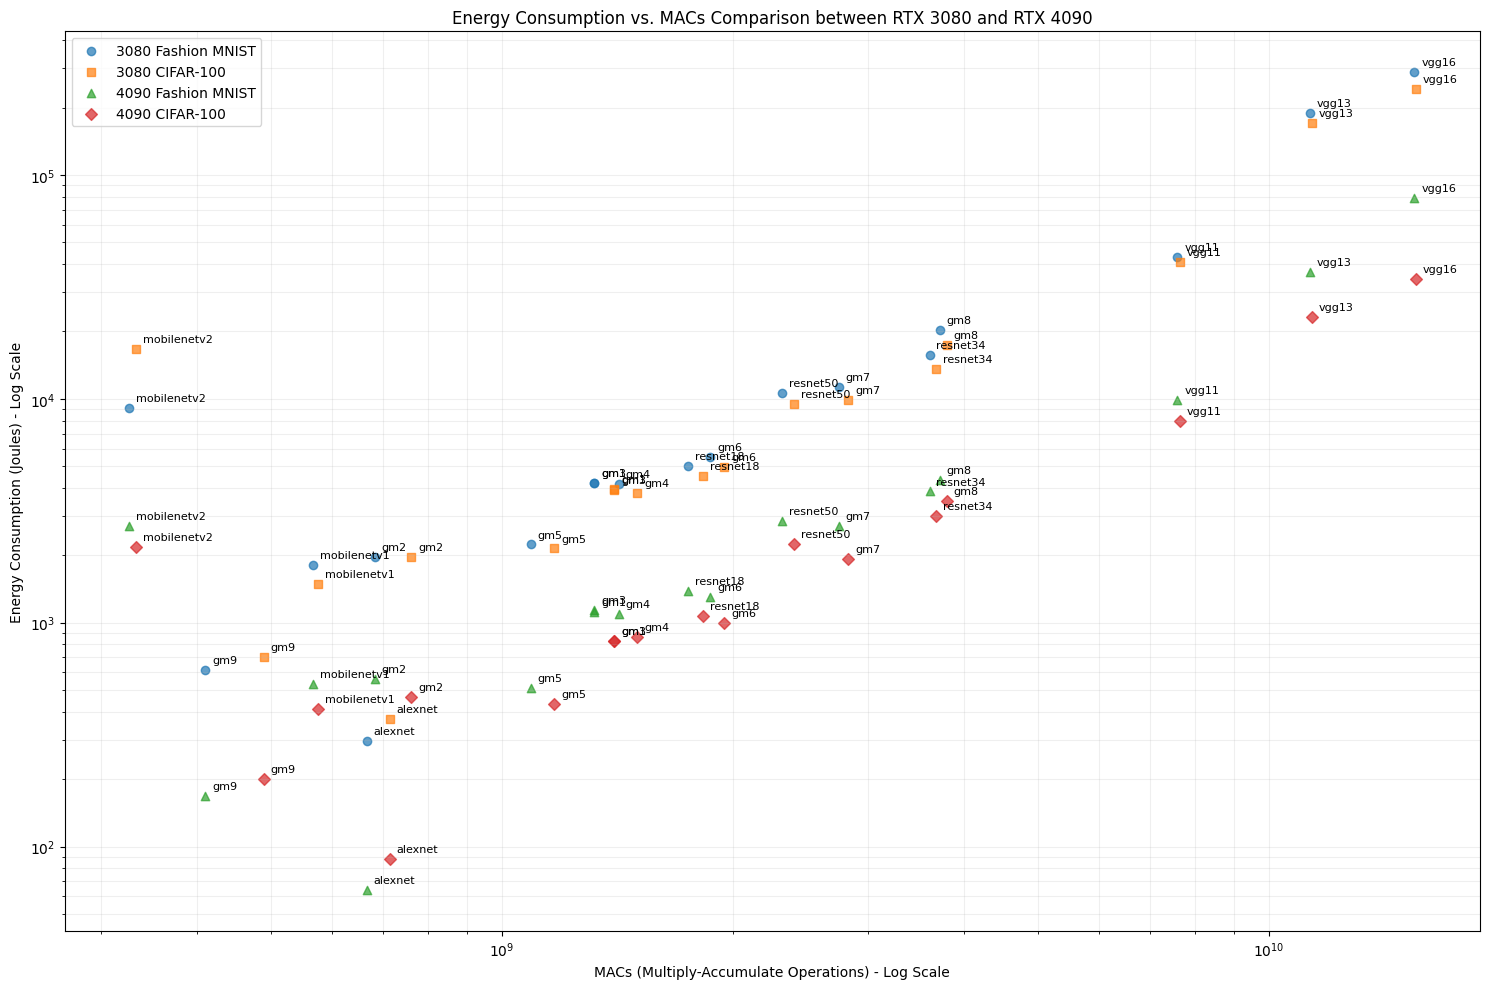

In [66]:
plt.figure(figsize=(15, 10))

# Create scatter plots for 3080
plt.scatter(model_macs_fashionmnist, energy_consumption_f3080, label='3080 Fashion MNIST', marker='o', alpha=0.7)
plt.scatter(model_macs_cifar100, energy_consumption_c3080, label='3080 CIFAR-100', marker='s', alpha=0.7)

# Create scatter plots for 4090
plt.scatter(model_macs_fashionmnist, energy_consumption_f4090, label='4090 Fashion MNIST', marker='^', alpha=0.7)
plt.scatter(model_macs_cifar100, energy_consumption_c4090, label='4090 CIFAR-100', marker='D', alpha=0.7)

# Add annotations for all points
for i, model in enumerate(macs_models):
    # Replace 'googlenet_mod' with 'gm' in labels
    label = model.replace('googlenet_mod', 'gm')
    
    # Label Fashion MNIST points
    plt.annotate(label, 
                (model_macs_fashionmnist[i], energy_consumption_f3080[i]),
                xytext=(5, 5), 
                textcoords='offset points', 
                fontsize=8)
    plt.annotate(label, 
                (model_macs_fashionmnist[i], energy_consumption_f4090[i]),
                xytext=(5, 5), 
                textcoords='offset points', 
                fontsize=8)
    
    # Label CIFAR-100 points
    plt.annotate(label, 
                (model_macs_cifar100[i], energy_consumption_c3080[i]),
                xytext=(5, 5), 
                textcoords='offset points', 
                fontsize=8)
    plt.annotate(label, 
                (model_macs_cifar100[i], energy_consumption_c4090[i]),
                xytext=(5, 5), 
                textcoords='offset points', 
                fontsize=8)

plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale

plt.xlabel('MACs (Multiply-Accumulate Operations) - Log Scale')
plt.ylabel('Energy Consumption (Joules) - Log Scale')
plt.title('Energy Consumption vs. MACs Comparison between RTX 3080 and RTX 4090')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()
plt.tight_layout()

In [ ]:
plt.figure(figsize=(15, 10))

# Create scatter plots for 3080
plt.scatter(model_macs_fashionmnist, energy_consumption_f3080, label='3080 Fashion MNIST', marker='o', alpha=0.7)
# plt.scatter(model_macs_cifar100, energy_consumption_c3080, label='3080 CIFAR-100', marker='s', alpha=0.7)

# # Create scatter plots for 4090
# plt.scatter(model_macs_fashionmnist, energy_consumption_f4090, label='4090 Fashion MNIST', marker='^', alpha=0.7)
# plt.scatter(model_macs_cifar100, energy_consumption_c4090, label='4090 CIFAR-100', marker='D', alpha=0.7)

# Add annotations for all points
for i, model in enumerate(macs_models):
    # Replace 'googlenet_mod' with 'gm' in labels
    label = model.replace('googlenet_mod', 'gm')
    
    # Label Fashion MNIST points
    plt.annotate(label, 
                (model_macs_fashionmnist[i], energy_consumption_f3080[i]),
                xytext=(5, 5), 
                textcoords='offset points', 
                fontsize=8)
    # plt.annotate(label, 
    #             (model_macs_fashionmnist[i], energy_consumption_f4090[i]),
    #             xytext=(5, 5), 
    #             textcoords='offset points', 
    #             fontsize=8)
    
    # # Label CIFAR-100 points
    # plt.annotate(label, 
    #             (model_macs_cifar100[i], energy_consumption_c3080[i]),
    #             xytext=(5, 5), 
    #             textcoords='offset points', 
    #             fontsize=8)
    # plt.annotate(label, 
    #             (model_macs_cifar100[i], energy_consumption_c4090[i]),
    #             xytext=(5, 5), 
    #             textcoords='offset points', 
    #             fontsize=8)

plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale

plt.xlabel('MACs (Multiply-Accumulate Operations) - Log Scale')
plt.ylabel('Energy Consumption (Joules) - Log Scale')
plt.title('Energy Consumption vs. MACs Comparison between RTX 3080 and RTX 4090')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()
plt.tight_layout()